Command to extract physiochmeical properties


In [2]:
# C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\pfeature\\python_scripts\\pfeature_comp.py -i {input_file} -o {output_file} -j PCP

Command to extract Amino Acid Composition


In [1]:
# C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\pfeature\\python_scripts\\pfeature_comp.py -i {input_file} -o {output_file} -j AAC

Python program to automatically open the command prompt to run the command to extract the properties

In [ ]:
import subprocess
import os
import time

def run_pfeature_for_files(input_folder, output_folder):
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".fasta"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name.replace(".fasta", ".csv"))

            # Build the command to run the pfeature script for the current file
            command = f'python C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\pfeature\\python_scripts\\pfeature_comp.py -i {input_file} -o {output_file} -j PCP && timeout /t 5 && exit'

            print(f"Running command: {command}")

            subprocess.run(['start', 'cmd', '/K', command], shell=True)

            time.sleep(15)

def open_cmd_and_run():
    input_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg"
    output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_pcp_csv"

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    run_pfeature_for_files(input_folder, output_folder)

open_cmd_and_run()

Running command: python C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pfeature\python_scripts\pfeature_comp.py -i C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\1.fasta -o C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_pcp_csv\1.csv -j PCP && timeout /t 5 && exit
Running command: python C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pfeature\python_scripts\pfeature_comp.py -i C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\10.fasta -o C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_pcp_csv\10.csv -j PCP && timeout /t 5 && exit
Running command: python C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pfeature\python_scripts\pfeature_comp.py -i C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\11.fasta -o C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_pcp_csv\11.csv -j PCP && timeout /t 5 && exit
Running command: python 

to merge the csv file of PCP and AAC and from the dataset files

In [ ]:
import os
import pandas as pd


folder_path = r"C:/Users/HP/Desktop/final_year_project/output_fasta/folder_3"

dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):

        file_path = os.path.join(folder_path, filename)


        dfs.append(pd.read_csv(file_path))
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.to_csv('merged_output.csv', index=False)


Adding column result in all the cs files

In [ ]:
import os
import pandas as pd

folder_path = r"C:/Users/HP/Desktop/final_year_project/output_fasta/folder_3"
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):

        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['result'] = 0
        df.to_csv(file_path, index=False)

print("New column 'result' has been added to all CSV files.")


In [5]:
import os
import csv

def extract_gene_ids_from_fasta(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file_name in os.listdir(input_folder):
        if file_name.endswith(".fasta"):
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name.replace(".fasta", ".csv"))

            gene_ids = []

            with open(input_path, "r") as fasta_file:
                for line in fasta_file:
                    if line.startswith(">sp|"):
                        parts = line.split("|")
                        if len(parts) >= 2:
                            gene_ids.append([parts[1].strip()])  # Extract the gene ID

            # Write gene IDs to CSV
            with open(output_path, "w", newline="") as csv_file:
                writer = csv.writer(csv_file)
                writer.writerow(["Gene ID"])  # CSV header
                writer.writerows(gene_ids)

            print(f"Extracted gene IDs from {file_name} -> {output_path}")

# Example usage:
input_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\neg"
output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\gene_id_csvs"
extract_gene_ids_from_fasta(input_folder, output_folder)


Extracted gene IDs from uniprotkb_sars_cov_2_AND_model_organism_2025_05_11.fasta -> C:\Users\HP\Desktop\final_project_again\NEGATIVE\gene_id_csvs\uniprotkb_sars_cov_2_AND_model_organism_2025_05_11.csv


In [6]:
import os
import csv

def split_fasta_and_extract_ids(input_fasta, fasta_output_folder, csv_output_folder, sequences_per_file=350):
    if not os.path.exists(fasta_output_folder):
        os.makedirs(fasta_output_folder)
    if not os.path.exists(csv_output_folder):
        os.makedirs(csv_output_folder)

    with open(input_fasta, 'r') as file:
        count = 0
        file_index = 1
        current_seqs = []
        current_gene_ids = []

        for line in file:
            if line.startswith(">"):
                if count == sequences_per_file:
                    # Write current FASTA file
                    fasta_path = os.path.join(fasta_output_folder, f"{file_index}.fasta")
                    with open(fasta_path, 'w') as fasta_out:
                        fasta_out.writelines(current_seqs)

                    # Write gene ID CSV
                    csv_path = os.path.join(csv_output_folder, f"{file_index}.csv")
                    with open(csv_path, 'w', newline='') as csv_out:
                        writer = csv.writer(csv_out)
                        writer.writerow(["Gene ID"])
                        writer.writerows([[gid] for gid in current_gene_ids])

                    print(f"Saved: {fasta_path} and {csv_path}")

                    file_index += 1
                    count = 0
                    current_seqs = []
                    current_gene_ids = []

                # Extract gene ID
                parts = line.split("|")
                if len(parts) >= 3:
                    gene_id = parts[1].strip()
                    current_gene_ids.append(gene_id)

                count += 1
            current_seqs.append(line)

        # Save the last batch
        if current_seqs:
            fasta_path = os.path.join(fasta_output_folder, f"{file_index}.fasta")
            with open(fasta_path, 'w') as fasta_out:
                fasta_out.writelines(current_seqs)

            csv_path = os.path.join(csv_output_folder, f"{file_index}.csv")
            with open(csv_path, 'w', newline='') as csv_out:
                writer = csv.writer(csv_out)
                writer.writerow(["Gene ID"])
                writer.writerows([[gid] for gid in current_gene_ids])

            print(f"Saved: {fasta_path} and {csv_path}")

# Example usage:
input_fasta = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_20k.fasta"
fasta_output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg"
csv_output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid"

split_fasta_and_extract_ids(input_fasta, fasta_output_folder, csv_output_folder, sequences_per_file=350)


Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\1.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid\1.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\2.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid\2.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\3.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid\3.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\4.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid\4.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\5.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_geneid\5.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative\fasta_all_neg\6.fasta and C:\Users\HP\Desktop\final_project_again\NEGATIVE\

In [10]:
import os
import pandas as pd

def clean_csv_files(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            try:
                # Read the CSV file
                df = pd.read_csv(input_path)

                # Drop rows where all columns are NaN
                df_cleaned = df.dropna(how='all')

                # Reset index
                df_cleaned.reset_index(drop=True, inplace=True)

                # Save the cleaned CSV
                df_cleaned.to_csv(output_path, index=False)
                print(f"✅ Cleaned: {filename}")
            except Exception as e:
                print(f"❌ Failed to process {filename}: {e}")

# === Example usage ===
input_folder =r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_1\negative_pcp_csv"
output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_1\negative_pcp_csv_no_gap"

clean_csv_files(input_folder, output_folder)


✅ Cleaned: 1.csv
✅ Cleaned: 13.csv
✅ Cleaned: 14.csv
✅ Cleaned: 15.csv
✅ Cleaned: 16.csv
✅ Cleaned: 17.csv
✅ Cleaned: 18.csv
✅ Cleaned: 19.csv
✅ Cleaned: 2.csv
✅ Cleaned: 20.csv
✅ Cleaned: 21.csv
✅ Cleaned: 23.csv
✅ Cleaned: 24.csv
✅ Cleaned: 26.csv
✅ Cleaned: 27.csv
✅ Cleaned: 28.csv
✅ Cleaned: 29.csv
✅ Cleaned: 3.csv
✅ Cleaned: 31.csv
✅ Cleaned: 32.csv
✅ Cleaned: 33.csv
✅ Cleaned: 34.csv
✅ Cleaned: 35.csv
✅ Cleaned: 38.csv
✅ Cleaned: 4.csv
✅ Cleaned: 40.csv
✅ Cleaned: 42.csv
✅ Cleaned: 43.csv
✅ Cleaned: 44.csv
✅ Cleaned: 45.csv
✅ Cleaned: 47.csv
✅ Cleaned: 48.csv
✅ Cleaned: 49.csv
✅ Cleaned: 5.csv
✅ Cleaned: 50.csv
✅ Cleaned: 51.csv
✅ Cleaned: 52.csv
✅ Cleaned: 53.csv
✅ Cleaned: 54.csv
✅ Cleaned: 55.csv
✅ Cleaned: 56.csv
✅ Cleaned: 57.csv
✅ Cleaned: 58.csv
✅ Cleaned: 59.csv
✅ Cleaned: 6.csv
✅ Cleaned: 7.csv
✅ Cleaned: 9.csv


In [12]:
import os
import pandas as pd

# Use raw strings for Windows paths
folder1 = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\fasta_all_geneid"
folder2 = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\negative_aac_csv_no_gap"
folder3 = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\negative_pcp_csv_no_gap"
output_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged"

os.makedirs(output_folder, exist_ok=True)

csvs1 = sorted([f for f in os.listdir(folder1) if f.endswith('.csv')])
csvs2 = sorted([f for f in os.listdir(folder2) if f.endswith('.csv')])
csvs3 = sorted([f for f in os.listdir(folder3) if f.endswith('.csv')])

num_files = min(len(csvs1), len(csvs2), len(csvs3))

for i in range(num_files):
    df1 = pd.read_csv(os.path.join(folder1, csvs1[i]))
    df2 = pd.read_csv(os.path.join(folder2, csvs2[i]))
    df3 = pd.read_csv(os.path.join(folder3, csvs3[i]))

    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    df3.reset_index(drop=True, inplace=True)

    merged_df = pd.concat([df1, df2, df3], axis=1)

    output_path = os.path.join(output_folder, f'merged_{i+1}.csv')
    merged_df.to_csv(output_path, index=False)
    print(f'Saved: {output_path}')

Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_1.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_2.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_3.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_4.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_5.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_6.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_7.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_8.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_9.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_10.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\merged_11.csv
Saved: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged\mer

In [13]:
import os
import pandas as pd

# Set the folder containing your CSV files
input_folder = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged"  # ← Change this path

# Loop through each CSV file in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        try:
            # Load CSV
            df = pd.read_csv(file_path)

            # Add 'result' column with value 0
            df["result"] = 0

            # Save back to same file (overwrite)
            df.to_csv(file_path, index=False)
            print(f"✅ Updated: {filename}")
        except Exception as e:
            print(f"❌ Failed to process {filename}: {e}")


❌ Failed to process merged_1.csv: [Errno 13] Permission denied: 'C:\\Users\\HP\\Desktop\\final_project_again\\NEGATIVE\\dataset\\merged\\merged_1.csv'
✅ Updated: merged_10.csv
✅ Updated: merged_11.csv
✅ Updated: merged_12.csv
✅ Updated: merged_13.csv
✅ Updated: merged_14.csv
✅ Updated: merged_15.csv
✅ Updated: merged_16.csv
✅ Updated: merged_17.csv
✅ Updated: merged_18.csv
✅ Updated: merged_19.csv
✅ Updated: merged_2.csv
✅ Updated: merged_20.csv
✅ Updated: merged_21.csv
✅ Updated: merged_22.csv
✅ Updated: merged_23.csv
✅ Updated: merged_24.csv
✅ Updated: merged_25.csv
✅ Updated: merged_26.csv
✅ Updated: merged_27.csv
✅ Updated: merged_28.csv
✅ Updated: merged_29.csv
✅ Updated: merged_3.csv
✅ Updated: merged_30.csv
✅ Updated: merged_31.csv
✅ Updated: merged_32.csv
✅ Updated: merged_33.csv
✅ Updated: merged_34.csv
✅ Updated: merged_35.csv
✅ Updated: merged_36.csv
✅ Updated: merged_37.csv
✅ Updated: merged_38.csv
✅ Updated: merged_39.csv
✅ Updated: merged_4.csv
✅ Updated: merged_40.csv
✅ 

In [16]:
import os
import pandas as pd

# Path to your folder containing CSVs
folder_path = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged"  # Change this to your folder

# Output file path
output_file = r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged_output.csv"  # Change this to desired output path

# Get list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to hold DataFrames
dataframes = []

# Read and append each CSV to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames row-wise
merged_df = pd.concat(dataframes, ignore_index=True)

# Save to a new CSV file
merged_df.to_csv(output_file, index=False)
print(f"All CSVs merged and saved to: {output_file}")

All CSVs merged and saved to: C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged_output.csv


In [20]:
import pandas as pd

# === Step 1: Load your dataset ===
df = pd.read_csv(r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative.csv")  # Replace with your file

# === Step 2: Sort by the 'geneid' column alphabetically ===
df_sorted = df.sort_values(by='Entry')  # Change 'geneid' if your column has a different name

# === Step 3: Save or view the result ===
df_sorted.to_csv(r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\negative_sorted_by_centrality.csv", index=False)
print("Dataset sorted by geneid and saved to 'sorted_by_geneid.csv'")

Dataset sorted by geneid and saved to 'sorted_by_geneid.csv'


In [4]:
import pandas as pd

# Load both CSVs
merged_df = pd.read_csv(r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\merged_output.csv")
negative_df = pd.read_csv(r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\negative.csv")

# Merge where genid == Entry
merged_filtered = pd.merge(merged_df, negative_df, how='inner', left_on='Gene ID', right_on='Entry')

# Save the merged output
merged_filtered.to_csv(r"C:\Users\HP\Desktop\final_project_again\NEGATIVE\dataset\matched_output.csv", index=False)
print("✅ Merged file saved as 'matched_output.csv'")


✅ Merged file saved as 'matched_output.csv'


In [8]:
import pandas as pd
import os

# === User input ===
excel_path = input("Enter full path of the Excel file: ").strip()
base_folder = input("Enter the name of the base output folder: ").strip()
chunk_size = 340

# === Load the Excel file ===
df = pd.read_excel(excel_path)

# === Create base output folder ===
os.makedirs(base_folder, exist_ok=True)

# === Loop to split and save chunks ===
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size]
    
    # CSV file name: data_1.csv, data_2.csv, etc.
    csv_filename = f"data_{i // chunk_size + 1}.csv"
    csv_path = os.path.join(base_folder, csv_filename)

    # Save the chunk
    chunk.to_csv(csv_path, index=False)
    print(f"✅ Saved: {csv_path}")


Enter full path of the Excel file:  C:\Users\HP\Desktop\final_project_again\negative_final\negative_dataset-12-05-2025.xlsx
Enter the name of the base output folder:  C:\Users\HP\Desktop\final_project_again\negative_final


✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_1.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_2.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_3.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_4.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_5.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_6.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_7.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_8.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_9.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_10.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_11.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_12.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\negative_final\data_13.csv
✅ Saved: C:\Users\HP\

In [14]:
import pandas as pd
import os
import glob

# === USER INPUT ===
positive_csv_path = input("Enter full path to the positive dataset CSV: ").strip()
negative_folder_path = input("Enter full path to the folder containing negative CSV files: ").strip()
output_dir = input("Enter full path to the folder where final datasets should be saved: ").strip()

# === Create output folder if it doesn't exist ===
os.makedirs(output_dir, exist_ok=True)

# === Load positive dataset ===
positive_df = pd.read_excel(positive_csv_path)

# === Get all CSV files inside the negative dataset folder ===
negative_csv_files = sorted(glob.glob(os.path.join(negative_folder_path, "*.csv")))

# === Process each negative CSV file ===
for idx, neg_file in enumerate(negative_csv_files, start=1):
    negative_df = pd.read_csv(neg_file)

    # Combine and shuffle without adding any label
    combined_df = pd.concat([positive_df, negative_df], ignore_index=True)
    combined_df = combined_df.sample(frac=1).reset_index(drop=True)

    # Save to output
    output_file = os.path.join(output_dir, f'dataset{idx}.csv')
    combined_df.to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")

print("🎉 All merged datasets are saved without labels.")


Enter full path to the positive dataset CSV:  C:\Users\HP\Desktop\final_project_again\positive_fnal\positive_dataset.xlsx
Enter full path to the folder containing negative CSV files:  C:\Users\HP\Desktop\final_project_again\negative_final
Enter full path to the folder where final datasets should be saved:  C:\Users\HP\Desktop\final_project_again\final


✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset1.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset2.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset3.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset4.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset5.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset6.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset7.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset8.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset9.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset10.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset11.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset12.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset13.csv
✅ Saved: C:\Users\HP\Desktop\final_project_again\final\dataset14.csv
✅ Saved: C:\Users\HP\Desktop\final_project_

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from fpdf import FPDF
import glob

# === Take folder input from user ===
folder_path = input("Enter the full path to the folder containing CSV files: ").strip()
output_pdf = r"C:\Users\HP\Desktop\final_project_again\dataset_10-20\Model_Report.pdf"

# === Create plot folder ===
os.makedirs("plots", exist_ok=True)

def process_csv(file_path):
    df = pd.read_csv(file_path)

    if 'radiality' in df.columns:
        df['radiality'].replace([np.inf, -np.inf], 1, inplace=True)

    # Drop non-numeric or unnecessary columns
    df.drop(columns=['Gene ID', 'NumberOfDirectedEdges', "selected", "IsSingleNode","Radiality"], inplace=True, errors='ignore')
    df.dropna(axis=1, how='all', inplace=True)

    # Remove highly correlated features
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    df.drop(columns=to_drop, inplace=True)

    X = df.drop(columns=['result'])
    y = df['result']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest parameters
    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [8, 10],
        'min_samples_split': [20, 30],
        'min_samples_leaf': [15, 25],
        'max_samples': [0.7, 0.8],
        'max_features': ['sqrt']
    }

    best_score = 0
    best_model = None
    best_pca_components = None
    learning_plot_path = None

    for n_components in [10, 20, 30, 40, 50, 55]:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        rf = RandomForestClassifier(random_state=42)
        grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_pca, y_train)

        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_pca_components = n_components

            # Final model eval
            pca_final = PCA(n_components=best_pca_components)
            X_train_final = pca_final.fit_transform(X_train_scaled)
            X_test_final = pca_final.transform(X_test_scaled)

            best_model.fit(X_train_final, y_train)
            train_acc = best_model.score(X_train_final, y_train)
            test_acc = best_model.score(X_test_final, y_test)
            cv_scores = cross_val_score(best_model, X_train_final, y_train, cv=10)

            # Learning curve
            train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_final, y_train, cv=10)
            train_mean = np.mean(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)

            # Save learning curve plot
            plt.figure()
            plt.plot(train_sizes, train_mean, label='Train', marker='o')
            plt.plot(train_sizes, test_mean, label='Validation', marker='s')
            plt.xlabel('Training Samples')
            plt.ylabel('Accuracy')
            plt.title(f'Learning Curve (PCA={n_components})')
            plt.legend()
            plot_filename = f"plots/{os.path.basename(file_path).replace('.csv','')}_curve.png"
            plt.savefig(plot_filename)
            plt.close()

            learning_plot_path = plot_filename

    return {
        "filename": os.path.basename(file_path),
        "train_acc": train_acc,
        "test_acc": test_acc,
        "cv_acc": best_score,
        "cv_std": cv_scores.std(),
        "pca": best_pca_components,
        "plot_path": learning_plot_path
    }

# Process all CSVs in the folder
results = []
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
for file in csv_files:
    try:
        result = process_csv(file)
        results.append(result)
    except Exception as e:
        print(f"❌ Failed to process {file}: {e}")

# Sort by descending test accuracy
results = sorted(results, key=lambda x: x['test_acc'], reverse=True)

# Create PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

for res in results:
    pdf.add_page()
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(200, 10, f"Results for: {res['filename']}", ln=True)

    pdf.set_font("Arial", '', 12)
    pdf.cell(200, 10, f"PCA Components: {res['pca']}", ln=True)
    pdf.cell(200, 10, f"Training Accuracy: {res['train_acc']:.4f}", ln=True)
    pdf.cell(200, 10, f"Test Accuracy: {res['test_acc']:.4f}", ln=True)
    pdf.cell(200, 10, f"Cross-Val Accuracy: {res['cv_acc']:.4f} ± {res['cv_std']:.4f}", ln=True)

    if res['plot_path'] and os.path.exists(res['plot_path']):
        pdf.image(res['plot_path'], x=10, y=None, w=180)

# Save PDF
pdf.output(output_pdf)
print(f"✅ Report saved as '{output_pdf}'")


Enter the full path to the folder containing CSV files:  C:\Users\HP\Desktop\final_project_again\dataset_10-20


❌ Failed to process C:\Users\HP\Desktop\final_project_again\dataset_10-20\dataset12.csv: n_components=55 must be between 0 and min(n_samples, n_features)=52 with svd_solver='covariance_eigh'


Dropped Correlated Features: ['PCP_AL', 'PCP_AC', 'PCP_BS', 'PCP_NE_pH', 'PCP_LR', 'Eccentricity', 'NumberOfUndirectedEdges']
Final Feature Set: ['PCP_PC', 'PCP_NC', 'PCP_NE', 'PCP_PO', 'PCP_NP', 'PCP_CY', 'PCP_AR', 'PCP_HB', 'PCP_HL', 'PCP_NT', 'PCP_HX', 'PCP_SC', 'PCP_SS_HE', 'PCP_SS_ST', 'PCP_SS_CO', 'PCP_SA_BU', 'PCP_SA_EX', 'PCP_SA_IN', 'PCP_TN', 'PCP_SM', 'PCP_Z1', 'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5', 'AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'Degree', 'NeighborhoodConnectivity', 'Stress', 'TopologicalCoefficient']


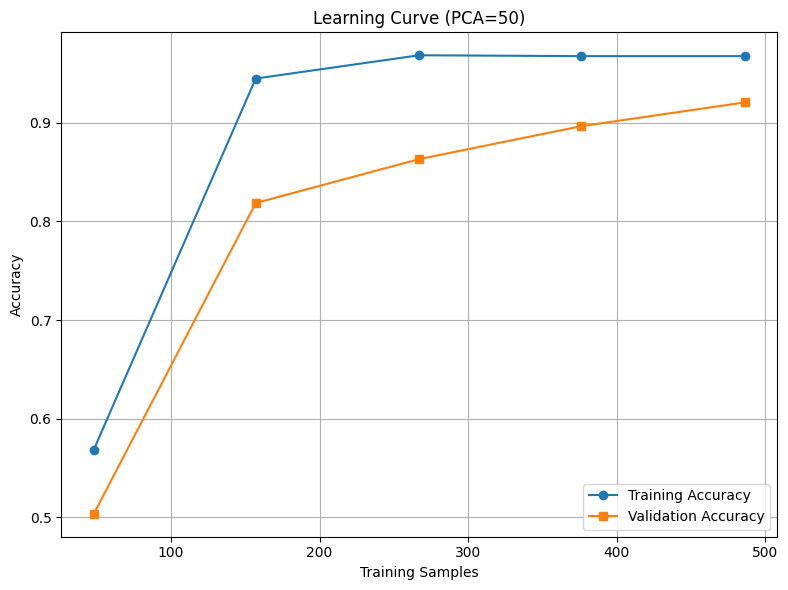

✅ Best PCA Components: 50
✅ Training Accuracy: 0.9667
✅ Test Accuracy: 0.8741
✅ Cross-Validation Accuracy: 0.9204 ± 0.0431


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# === Load dataset ===
file_path = r"C:\Users\HP\Desktop\final_project_again\final\dataset45.csv"  # <-- Change path if needed
df = pd.read_csv(file_path)

# === Drop unwanted and non-numeric columns ===
# Updated list of columns to drop
columns_to_drop = [
    'Gene ID', 'selected', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs',
    'NumberOfDirectedEdges', 'IsSingleNode', 'Radiality'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop non-numeric columns (if any remain)
df = df.select_dtypes(include=[np.number])

# Drop constant columns (same value in all rows)
df = df.loc[:, df.nunique() > 1]

# === Drop highly correlated features (threshold > 0.9) ===
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

# === Prepare features and target ===
X = df.drop(columns=['result'])
y = df['result']

print("Dropped Correlated Features:", to_drop)
print("Final Feature Set:", X.columns.tolist())

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Scale features ===
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define Random Forest hyperparameter grid ===
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 10],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [15, 25],
    'max_samples': [0.7, 0.8],
    'max_features': ['sqrt']
}

# === Try different PCA component counts ===
best_pca_components = None
best_cv_score = 0
best_model = None

# Dynamically limit PCA components to number of features
max_components = X_train_scaled.shape[1]
pca_components_list = [n for n in [10, 20, 30, 40, 50, 55] if n <= max_components]

for n_components in pca_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)

    if grid_search.best_score_ > best_cv_score:
        best_cv_score = grid_search.best_score_
        best_pca_components = n_components
        best_model = grid_search.best_estimator_

# === Retrain on best config ===
pca_final = PCA(n_components=best_pca_components)
X_train_final = pca_final.fit_transform(X_train_scaled)
X_test_final = pca_final.transform(X_test_scaled)
best_model.fit(X_train_final, y_train)

# === Evaluation ===
train_acc_final = best_model.score(X_train_final, y_train)
test_acc_final = best_model.score(X_test_final, y_test)
cv_scores_final = cross_val_score(best_model, X_train_final, y_train, cv=10, scoring='accuracy')

# === Learning Curve ===
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_final, y_train, cv=10, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title(f'Learning Curve (PCA={best_pca_components})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print Summary ===
print(f'✅ Best PCA Components: {best_pca_components}')
print(f'✅ Training Accuracy: {train_acc_final:.4f}')
print(f'✅ Test Accuracy: {test_acc_final:.4f}')
print(f'✅ Cross-Validation Accuracy: {best_cv_score:.4f} ± {cv_scores_final.std():.4f}')

Dropped Features (Correlation > 0.9): ['PCP_AL', 'PCP_AC', 'PCP_BS', 'PCP_NE_pH', 'PCP_LR', 'Eccentricity', 'NumberOfUndirectedEdges']
Final Best Features: ['PCP_PC', 'PCP_NC', 'PCP_NE', 'PCP_PO', 'PCP_NP', 'PCP_CY', 'PCP_AR', 'PCP_HB', 'PCP_HL', 'PCP_NT', 'PCP_HX', 'PCP_SC', 'PCP_SS_HE', 'PCP_SS_ST', 'PCP_SS_CO', 'PCP_SA_BU', 'PCP_SA_EX', 'PCP_SA_IN', 'PCP_TN', 'PCP_SM', 'PCP_Z1', 'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5', 'AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree', 'NeighborhoodConnectivity', 'Stress', 'TopologicalCoefficient']


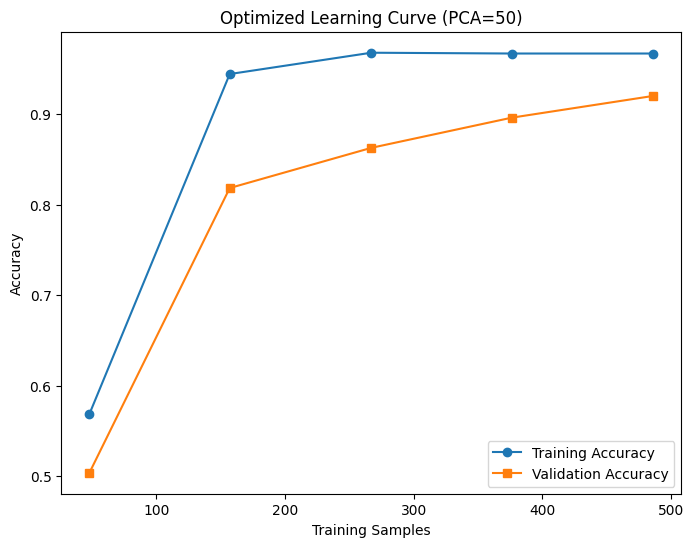

Best PCA Components: 50
Training Accuracy: 0.9667
Test Accuracy: 0.8741
Cross-Validation Accuracy: 0.9204 ± 0.0431


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load dataset
file_path = r"C:\Users\HP\Desktop\final_project_again\final\dataset45.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Drop non-numeric and constant columns
df.drop(columns= ['Gene ID', 'selected', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs',
    'NumberOfDirectedEdges', 'IsSingleNode', 'Radiality'], inplace=True, errors='ignore')

# Remove highly correlated features (threshold > 0.9)
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

# Print dropped features due to high correlation
print("Dropped Features (Correlation > 0.9):", to_drop)

# Separate features and target variable
X = df.drop(columns=['result'])
y = df['result']

# Print final best feature set
print("Final Best Features:", X.columns.tolist())

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 10],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [15, 25],
    'max_samples': [0.7, 0.8],
    'max_features': ['sqrt']
}

# Try multiple PCA components and find the best one
best_pca_components = None
best_cv_score = 0
best_model = None

# Limit the number of components to be the lesser of number of features or 50
max_pca_components = min(X_train_scaled.shape[1], 50)

for n_components in [10, 20, 30, 40, max_pca_components]:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Perform Grid Search with Cross-Validation
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)

    # Store the best result
    if grid_search.best_score_ > best_cv_score:
        best_cv_score = grid_search.best_score_
        best_pca_components = n_components
        best_model = grid_search.best_estimator_

# Train best model with optimal PCA components
pca_final = PCA(n_components=best_pca_components)
X_train_final = pca_final.fit_transform(X_train_scaled)
X_test_final = pca_final.transform(X_test_scaled)

best_model.fit(X_train_final, y_train)

# Final evaluation
train_acc_final = best_model.score(X_train_final, y_train)
test_acc_final = best_model.score(X_test_final, y_test)

# Cross-validation scores
cv_scores_final = cross_val_score(best_model, X_train_final, y_train, cv=10, scoring='accuracy')

# Learning Curve for Final Optimized Model
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_final, y_train, cv=10, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title(f'Optimized Learning Curve (PCA={best_pca_components})')
plt.legend()
plt.show()

# Print Best Results
print(f'Best PCA Components: {best_pca_components}')
print(f'Training Accuracy: {train_acc_final:.4f}')
print(f'Test Accuracy: {test_acc_final:.4f}')
print(f'Cross-Validation Accuracy: {best_cv_score:.4f} ± {cv_scores_final.std():.4f}')

Dropped Features (Correlation > 0.9): ['PCP_AL', 'PCP_AC', 'PCP_BS', 'PCP_NE_pH', 'PCP_LR', 'Eccentricity', 'NumberOfUndirectedEdges']
Final Best Features: ['PCP_PC', 'PCP_NC', 'PCP_NE', 'PCP_PO', 'PCP_NP', 'PCP_CY', 'PCP_AR', 'PCP_HB', 'PCP_HL', 'PCP_NT', 'PCP_HX', 'PCP_SC', 'PCP_SS_HE', 'PCP_SS_ST', 'PCP_SS_CO', 'PCP_SA_BU', 'PCP_SA_EX', 'PCP_SA_IN', 'PCP_TN', 'PCP_SM', 'PCP_Z1', 'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5', 'AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree', 'NeighborhoodConnectivity', 'Stress', 'TopologicalCoefficient']
PCA components retained: 27


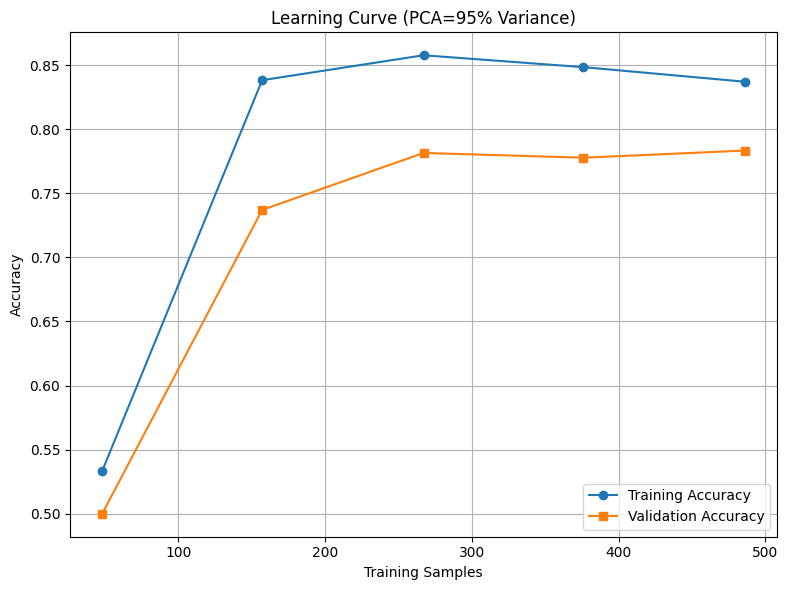

Best Parameters: {'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.7, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 100}
Training Accuracy: 0.8463
Test Accuracy: 0.8074
Cross-Validation Accuracy: 0.7833 ± 0.0431


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load dataset
file_path =r"C:\Users\HP\Desktop\final_project_again\final\dataset45.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Drop non-numeric and constant columns
df.drop(columns= ['Gene ID', 'selected', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs',
    'NumberOfDirectedEdges', 'IsSingleNode', 'Radiality'], inplace=True, errors='ignore')

# Remove highly correlated features (threshold > 0.9)
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

print("Dropped Features (Correlation > 0.9):", to_drop)

# Separate features and target
X = df.drop(columns=['result'])
y = df['result']
print("Final Best Features:", X.columns.tolist())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA with 95% explained variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"PCA components retained: {pca.n_components_}")

# Simplified and regularized parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 8],
    'min_samples_split': [20, 40],
    'min_samples_leaf': [20, 30],
    'max_samples': [0.6, 0.7],
    'max_features': ['sqrt', 'log2']
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Best model
best_model = grid_search.best_estimator_

# Final training
best_model.fit(X_train_pca, y_train)
train_acc = best_model.score(X_train_pca, y_train)
test_acc = best_model.score(X_test_pca, y_test)

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train_pca, y_train, cv=cv, scoring='accuracy')

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_pca, y_train, cv=cv, scoring='accuracy')

# Plot
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (PCA=95% Variance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from fpdf import FPDF
import joblib

# === Function to preprocess the dataset ===
def preprocess_data(file_path):
    df = pd.read_csv(file_path)

    # Handle infinite values and drop unnecessary columns
    if 'radiality' in df.columns:
        df['radiality'].replace([np.inf, -np.inf], 1, inplace=True)

    df.drop(columns=['Gene ID', 'NumberOfDirectedEdges', "selected", "IsSingleNode", "Radiality"], inplace=True, errors='ignore')
    df.dropna(axis=1, how='all', inplace=True)

    # Remove highly correlated features
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    df.drop(columns=to_drop, inplace=True)

    X = df.drop(columns=['result'])
    y = df['result']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Save the scaler
    joblib.dump(scaler, "scaler.pkl")
    print("✅ Saved scaler to 'scaler.pkl'")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X

# === Load dataset and preprocess ===
file_path = r"C:\Users\HP\Desktop\final_project_again\final\dataset25.csv"  # Replace with your dataset path
X_train_scaled, X_test_scaled, y_train, y_test, scaler, X = preprocess_data(file_path)

# === Function to create the model ===
def create_model(optimizer='adam', neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    elif optimizer == 'rmsprop':
        model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# === Hyperparameter Tuning ===
batch_sizes = [16, 32]
epochs = [10, 50]
optimizers = ['adam', 'rmsprop']
neurons = [64, 128]

best_score = 0
best_params = None
best_model = None
best_history = None

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Loop over hyperparameters
for batch_size in batch_sizes:
    for epoch in epochs:
        for optimizer in optimizers:
            for neuron in neurons:
                print(f"Training with batch_size={batch_size}, epochs={epoch}, optimizer={optimizer}, neurons={neuron}")
                model = KerasClassifier(model=create_model, optimizer=optimizer, neurons=neuron,
                                        batch_size=batch_size, epochs=epoch, verbose=0)

                history = model.fit(X_train_scaled, y_train,
                                    validation_data=(X_test_scaled, y_test),
                                    callbacks=[early_stop])

                train_acc = model.score(X_train_scaled, y_train)
                test_acc = model.score(X_test_scaled, y_test)

                print(f"Training Accuracy: {train_acc:.4f}")
                print(f"Test Accuracy: {test_acc:.4f}")

                if test_acc > best_score:
                    best_score = test_acc
                    best_params = {
                        'batch_size': batch_size,
                        'epochs': epoch,
                        'optimizer': optimizer,
                        'neurons': neuron
                    }
                    best_model = model
                    best_history = history

                    # Save best Keras model
                    model.model_.save("best_model.h5")
                    print("✅ Saved best model to 'best_model.h5'")

# === Final Evaluation ===
print(f"Best Test Accuracy: {best_score:.4f}")
print(f"Best Hyperparameters: {best_params}")

# === Generate PDF Report ===
results = {
    "training_accuracy": best_model.score(X_train_scaled, y_train),
    "test_accuracy": best_score,
    "best_params": best_params
}

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, f"Results for Deep Learning Model", ln=True)

pdf.set_font("Arial", '', 12)
pdf.cell(200, 10, f"Best Hyperparameters: {results['best_params']}", ln=True)
pdf.cell(200, 10, f"Training Accuracy: {results['training_accuracy']:.4f}", ln=True)
pdf.cell(200, 10, f"Test Accuracy: {results['test_accuracy']:.4f}", ln=True)

pdf.output("Model_Report.pdf")
print("✅ Report saved as 'Model_Report.pdf'")

# === Plot Learning Curves ===
history_dict = best_history.history_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === Overfitting Check ===
if history_dict['accuracy'][-1] > history_dict['val_accuracy'][-1]:
    print("⚠️ The model is overfitting!")
else:
    print("✅ The model is not overfitting.")

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Load and Preprocess Data ===
df = pd.read_csv(r"C:\Users\HP\Desktop\final_project_again\final\dataset25.csv")  # Make sure this CSV is in your project folder

# Handle infinite values and drop unnecessary columns
if 'radiality' in df.columns:
    df['radiality'].replace([np.inf, -np.inf], 1, inplace=True)

df.drop(columns=['Gene ID', 'NumberOfDirectedEdges', "selected", "IsSingleNode", "Radiality"], inplace=True, errors='ignore')
df.dropna(axis=1, how='all', inplace=True)

# Remove highly correlated features
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

X = df.drop(columns=['result'])
y = df['result']

# Save feature columns to reuse in Flask app
joblib.dump(X.columns.tolist(), "features.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# === Build Model ===
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# === Train Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, callbacks=[early_stop])

# Save model
model.save(r"C:\Users\HP\Desktop\final_project_again\final\dataset25.csv\best_model.h5")
print("✅ Model and scaler saved.")

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import pandas as pd
import os

# === Load your CSV file ===
input_file = r"C:\Users\HP\Desktop\final_project_again\dataset32 - dataset32.csv"  # Replace with your actual file name
df = pd.read_csv(input_file)

# === Specify your output folder ===
output_dir = r"C:\Users\HP\Desktop\final_project_again\splits_1"  # Replace with your desired folder path
os.makedirs(output_dir, exist_ok=True)

# === Split and save each row ===
pos_count = 1
neg_count = 1

for idx, row in df.iterrows():
    row_df = pd.DataFrame([row])
    
    # Drop the 'result' column before saving
    row_df = row_df.drop(columns=['result'])

    if row['result'] == 1:
        filename = f"positive_{pos_count}.csv"
        pos_count += 1
    else:
        filename = f"negative_{neg_count}.csv"
        neg_count += 1

    row_df.to_csv(os.path.join(output_dir, filename), index=False)

print(f"✅ Done! Created {pos_count - 1} positive and {neg_count - 1} negative CSV files in '{output_dir}/'")


✅ Done! Created 335 positive and 340 negative CSV files in 'C:\Users\HP\Desktop\final_project_again\splits_1/'
